In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## Create dataframes for train and test datasets

In [32]:
# Load Train ans Test dataset
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [33]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,...,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,63,0,0,0,0,0,0,0,0,...,50,0,0,0,0,0,0,0,29,19,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,4,0,0,0,0,0,0,0,0,...,90,55,0,0,0,0,0,255,243,255,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [34]:
# Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.
train_data = np.array(train_df, dtype = "float32")

In [35]:
# Similarly let us do the same process for test data
test_data = np.array(test_df, dtype = "float32")

In [36]:
# we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 
X_train = train_data[:, 1:] / 255
y_train = train_data[:,0]
X_test = test_data[:, 1:] / 255
y_test = test_data[:,0]

In [37]:
# split the training data into validation and actual training data for training the model and testing it using the validation set
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)


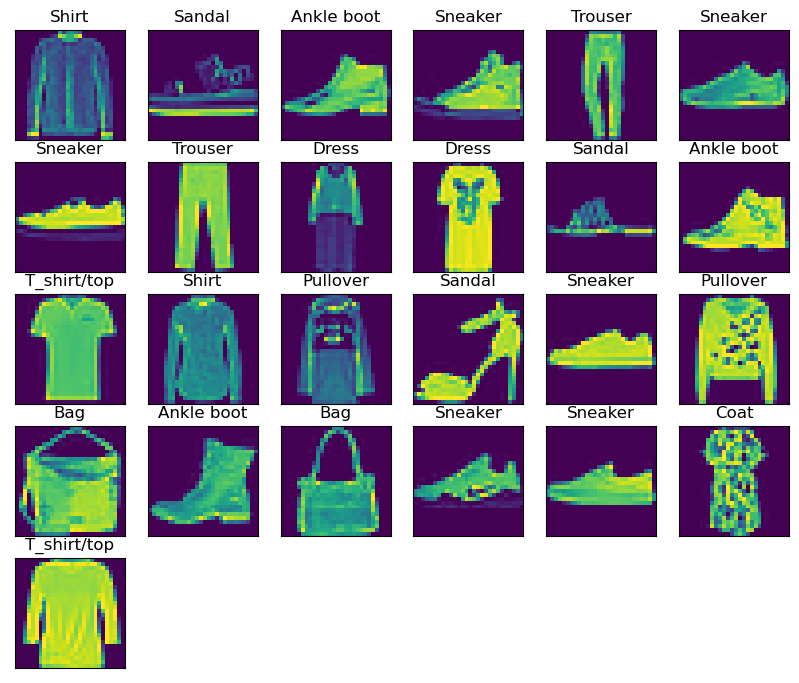

In [38]:
# Now let us visualise the some samples after the resize of the data
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

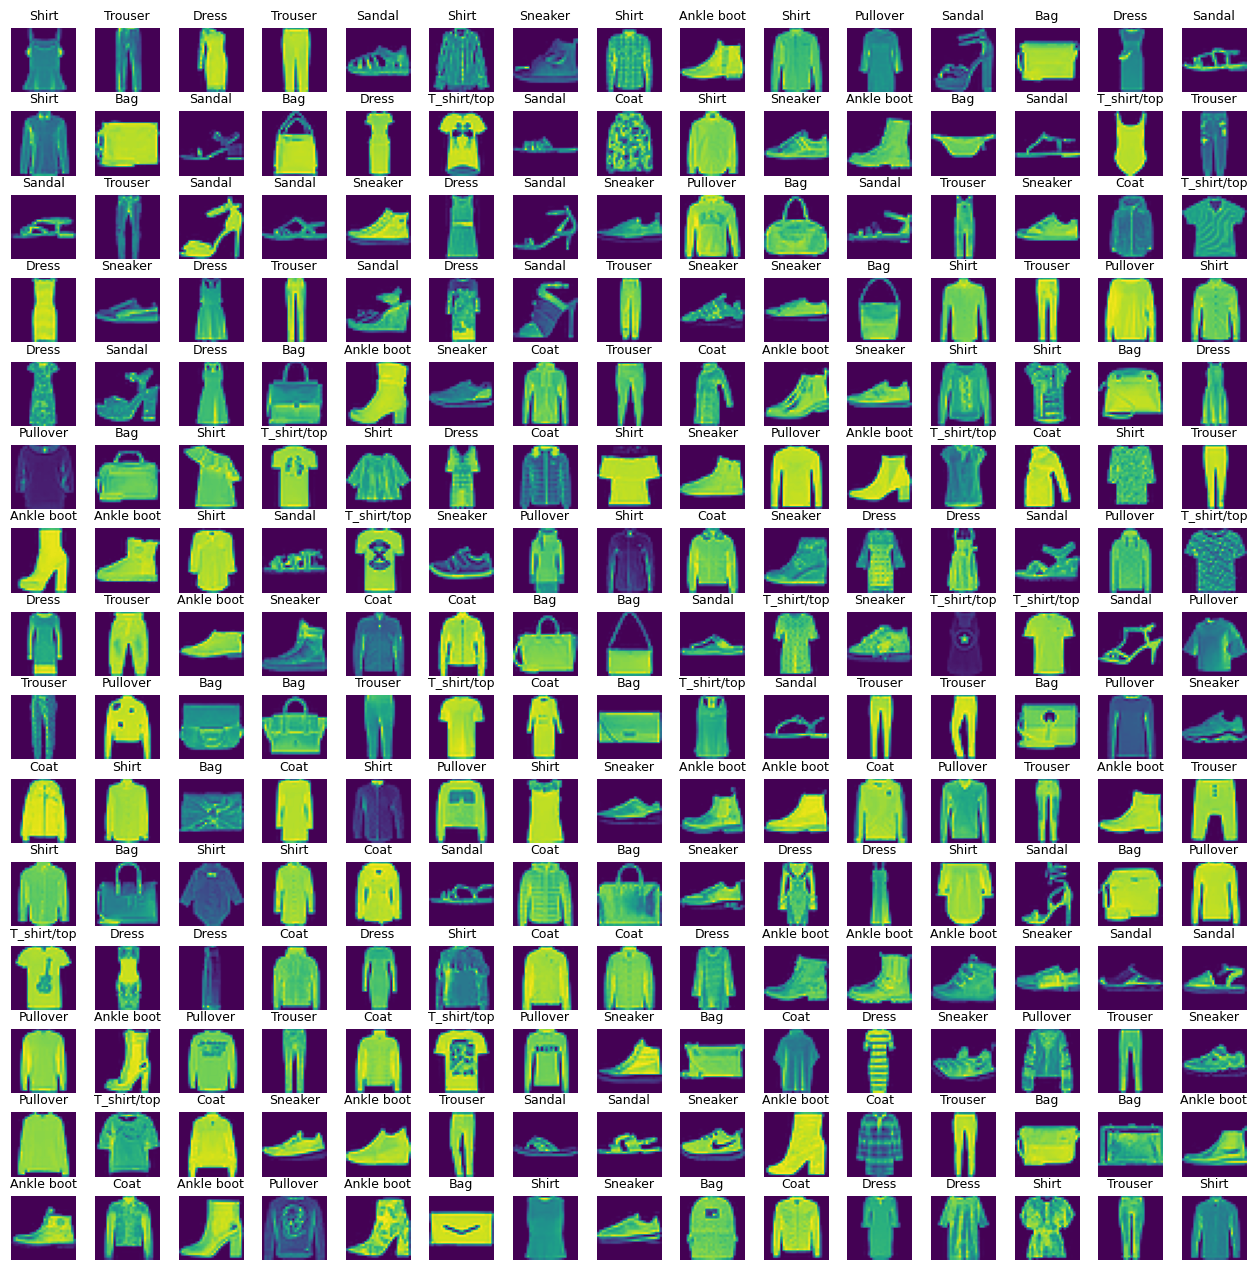

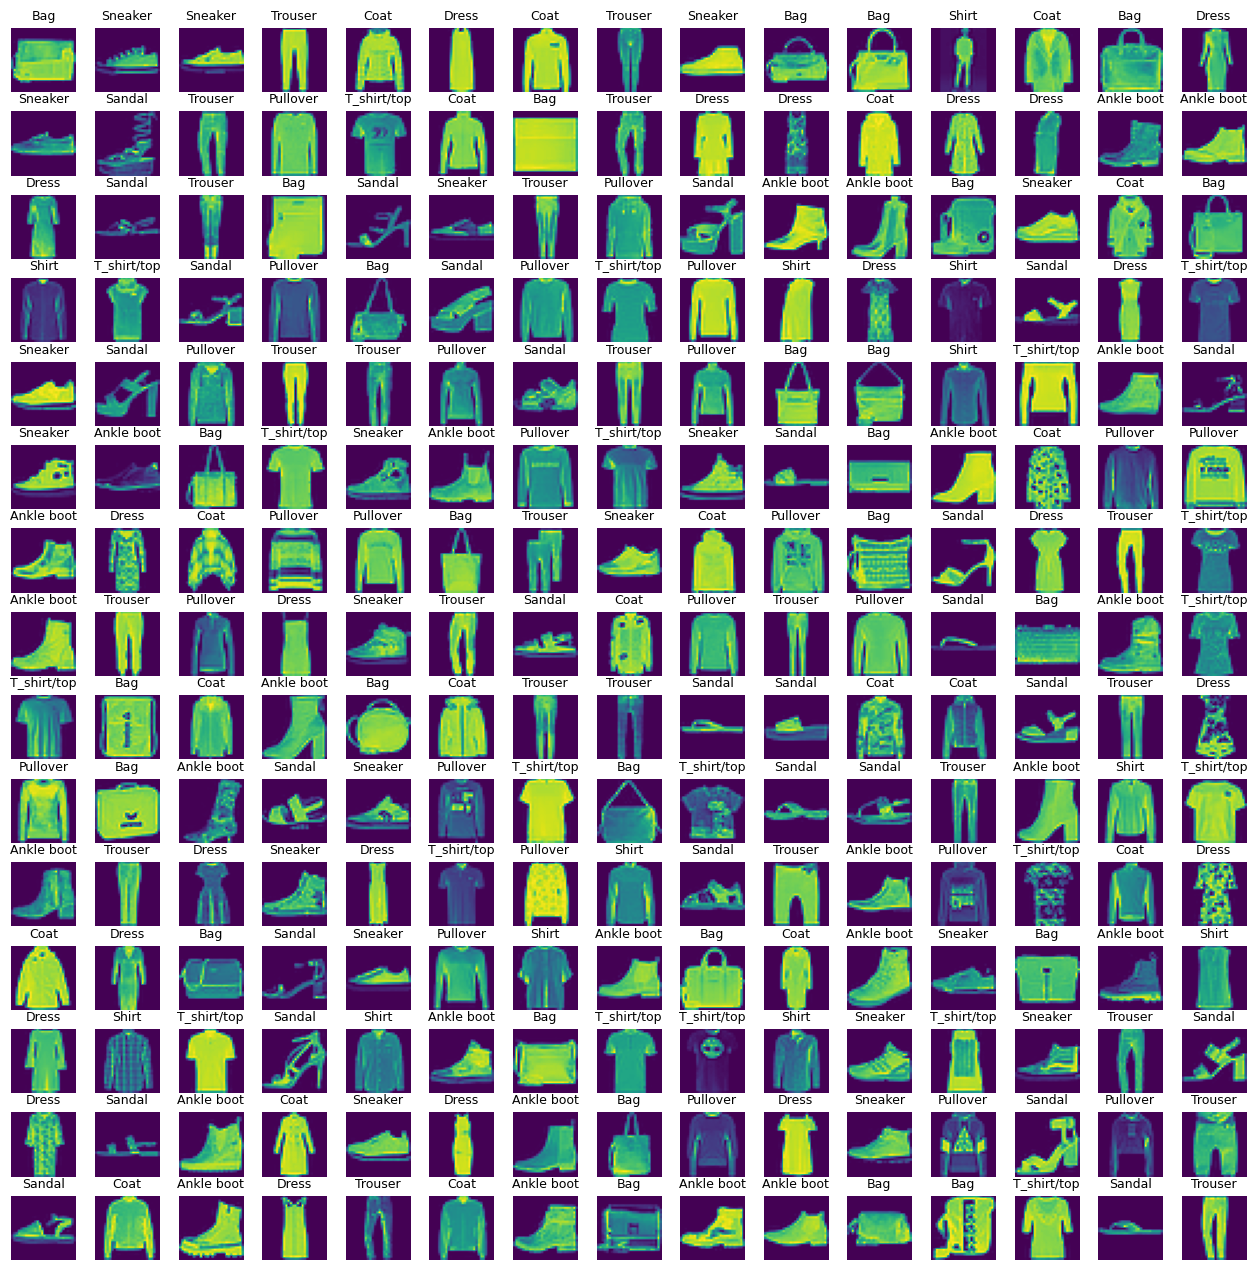

In [40]:
# Labels Each training and test example is assigned to one of the following labels as shown below:

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)
plt.show()

## Create The Model

In [42]:
# First of all let us define the shape of the image before we define the model.
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [43]:
# Now we need to do more formating on the x_train,x_test and x_validate sets
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *image_shape)

In [45]:
# Define the model
cnn_model = Sequential([
    Conv2D(filters = 30, kernel_size = 3, activation = "relu", input_shape = image_shape),
    MaxPooling2D(pool_size = 2), # down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [46]:
# Compile the Model
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = Adam(lr = 0.001), metrics = ["accuracy"])

In [49]:
# Train the model
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size = 4096,
    epochs = 75,
    verbose = 1,
    validation_data = (X_validate, y_validate)
)

Epoch 1/75
12/12 [==============================] - 14s 1s/step - loss: 1.7069 - accuracy: 0.4777 - val_loss: 1.0797 - val_accuracy: 0.6692
Epoch 2/75
12/12 [==============================] - 14s 1s/step - loss: 0.8562 - accuracy: 0.7305 - val_loss: 0.6815 - val_accuracy: 0.7713
Epoch 3/75
12/12 [==============================] - 15s 1s/step - loss: 0.6375 - accuracy: 0.7831 - val_loss: 0.5732 - val_accuracy: 0.8009
Epoch 4/75
12/12 [==============================] - 14s 1s/step - loss: 0.5517 - accuracy: 0.8094 - val_loss: 0.5128 - val_accuracy: 0.8203
Epoch 5/75
12/12 [==============================] - 13s 1s/step - loss: 0.5059 - accuracy: 0.8232 - val_loss: 0.4792 - val_accuracy: 0.8328
Epoch 6/75
12/12 [==============================] - 14s 1s/step - loss: 0.4738 - accuracy: 0.8353 - val_loss: 0.4534 - val_accuracy: 0.8437
Epoch 7/75
12/12 [==============================] - 13s 1s/step - loss: 0.4529 - accuracy: 0.8426 - val_loss: 0.4347 - val_accuracy: 0.8488
Epoch 8/75
12/12 [==

12/12 [==============================] - 13s 1s/step - loss: 0.2552 - accuracy: 0.9105 - val_loss: 0.2717 - val_accuracy: 0.9036
Epoch 60/75
12/12 [==============================] - 13s 1s/step - loss: 0.2571 - accuracy: 0.9090 - val_loss: 0.2694 - val_accuracy: 0.9036
Epoch 61/75
12/12 [==============================] - 13s 1s/step - loss: 0.2546 - accuracy: 0.9102 - val_loss: 0.2680 - val_accuracy: 0.9040
Epoch 62/75
12/12 [==============================] - 13s 1s/step - loss: 0.2536 - accuracy: 0.9103 - val_loss: 0.2684 - val_accuracy: 0.9051
Epoch 63/75
12/12 [==============================] - 13s 1s/step - loss: 0.2518 - accuracy: 0.9113 - val_loss: 0.2665 - val_accuracy: 0.9046
Epoch 64/75
12/12 [==============================] - 13s 1s/step - loss: 0.2495 - accuracy: 0.9117 - val_loss: 0.2653 - val_accuracy: 0.9061
Epoch 65/75
12/12 [==============================] - 13s 1s/step - loss: 0.2506 - accuracy: 0.9111 - val_loss: 0.2663 - val_accuracy: 0.9049
Epoch 66/75
12/12 [======

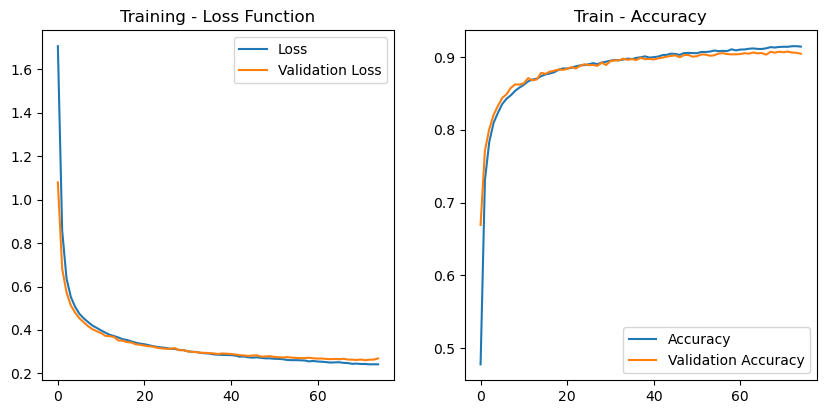

In [56]:
#Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.
plt.figure(figsize = (10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.title("Training - Loss Function")

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.title("Train - Accuracy")
plt.show()

In [58]:
# Evaluate /Score the model
score = cnn_model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2662
Test Accuracy : 0.9048


In [64]:
# Classification Report
num_classes = 10
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
#correct = np.nonzero(predicted_classes==y_true)[0]
#incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.86      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.85      0.86      0.86      1000
     Class 3       0.89      0.93      0.91      1000
     Class 4       0.81      0.92      0.86      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.82      0.62      0.71      1000
     Class 7       0.96      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

